In [2]:
import simpy
import numpy as np
import sys
from scipy import interpolate
from IPython.core.debugger import set_trace
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from virtualphysiology.organ.circulation import Tubo
from virtualphysiology.organ.heart import Heart

In [14]:
def grafico(system, title, init = 0):
    
    plt.title('Presión '+ title)
    for organ in system:
        a=system[organ].getDataFrame()[init:]
        plt.plot(a['p'],label=organ)
    plt.legend(loc='upper right')
    plt.rcParams['figure.dpi'] = 150
    plt.show()

    plt.title('Volumen '+ title)
    for organ in system:
        a=system[organ].getDataFrame()[init:]
        plt.plot(a['V'],label=organ)
    plt.legend(loc='upper right')
    plt.rcParams['figure.dpi'] = 150
    plt.show()
       

# Arterias en paralelo

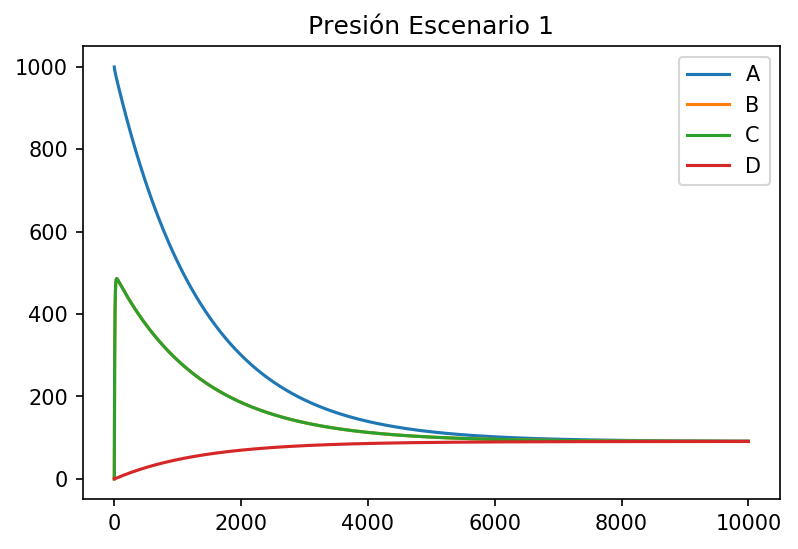

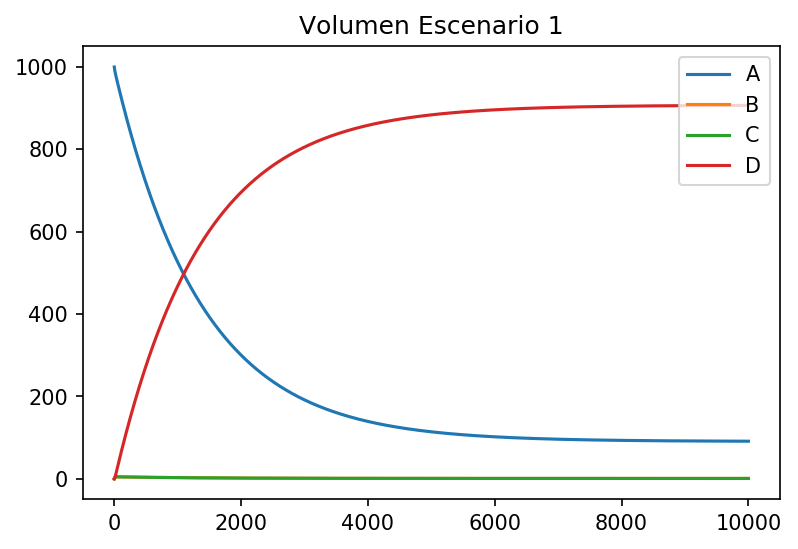

In [78]:
env = simpy.Environment()
system1 = {}
per = 0.001
system1['A'] = Tubo(env, system1, V0=1000,E=1,R=0,Vb=0,tubos=[("B",0),("C",0)],periodo = per)
system1['B'] = Tubo(env, system1, V0=0,E=100,R=3,Vb=0,tubos=[("A",0),("D",0)],periodo = per)
system1['C'] = Tubo(env, system1, V0=0,E=100,R=3,Vb=0,tubos=[("A",0),("D",0)],periodo = per)
system1['D'] = Tubo(env, system1, V0=0,E=0.1,R=0,Vb=0,tubos=[("B",0),("C",0)],periodo = per)
env.run(until=10)

grafico(system1,'Escenario 1')

La conexion en paralelo cada arteria tiene una resistencia de 3, por lo que ahora para obtener el mismo comportamiento la resistencia debería ser 1/(1/3+1/3)=1.5

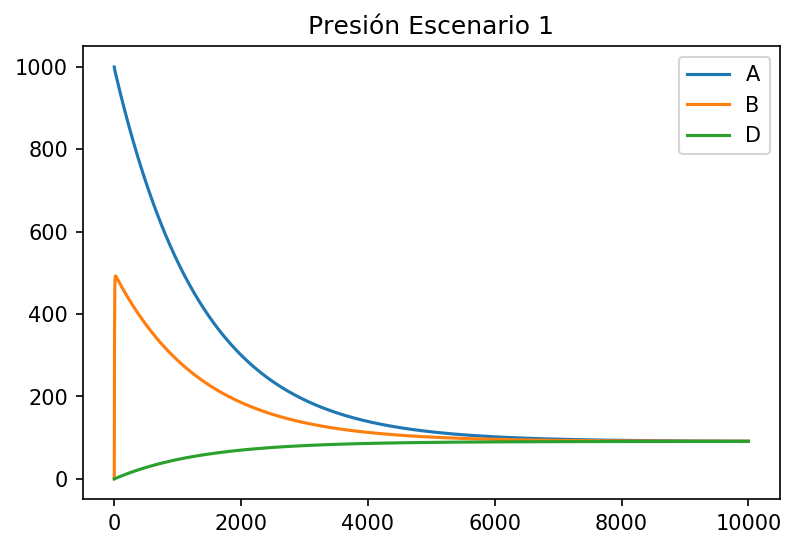

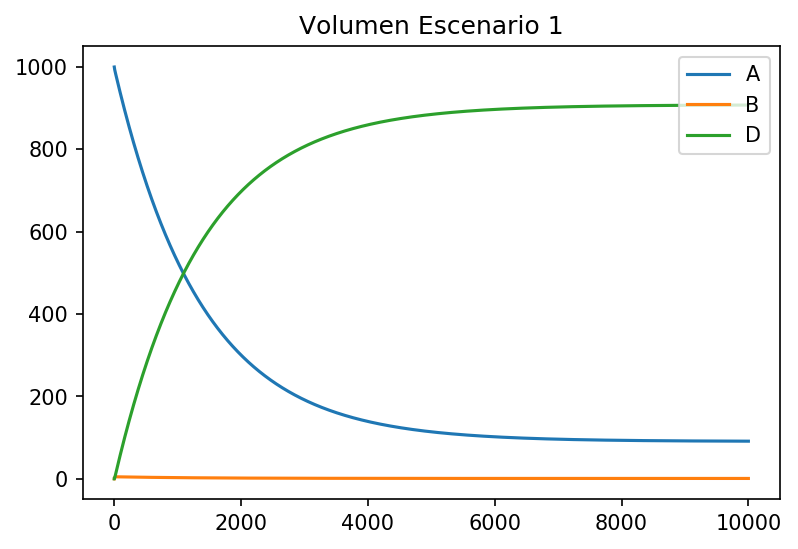

In [79]:
env = simpy.Environment()
system2 = {}
per = 0.001
system2['A'] = Tubo(env, system2, V0=1000,E=1,R=0,Vb=0,tubos=[("B",0)],periodo = per)
system2['B'] = Tubo(env, system2, V0=0,E=100,R=1.5,Vb=0,tubos=[("A",0),("D",0)],periodo = per)
system2['D'] = Tubo(env, system2, V0=0,E=0.1,R=0,Vb=0,tubos=[("B",0)],periodo = per)
env.run(until=10)

grafico(system2,'Escenario 1')

Al dibujar las dos curvas de llenado de D, una con dos tubos en paralelo de resistencia 3 y la otra con una unica arteria con resistencia 1.5 se observan que se rellenan a la misma velocidad

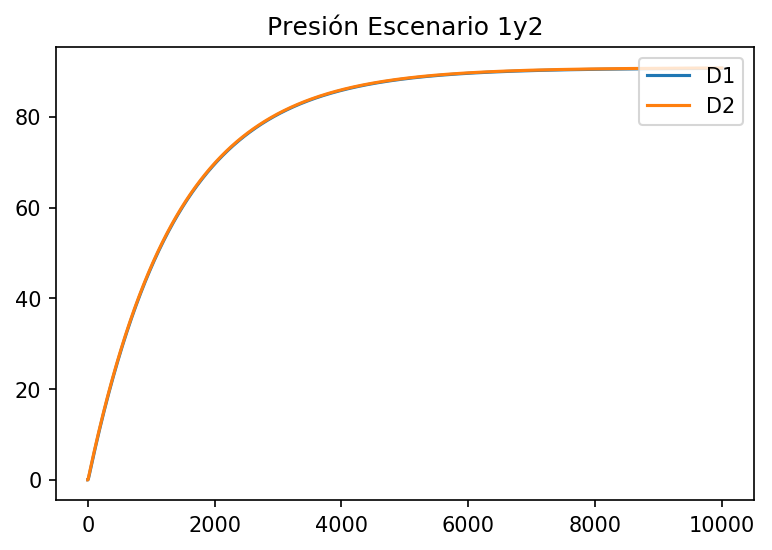

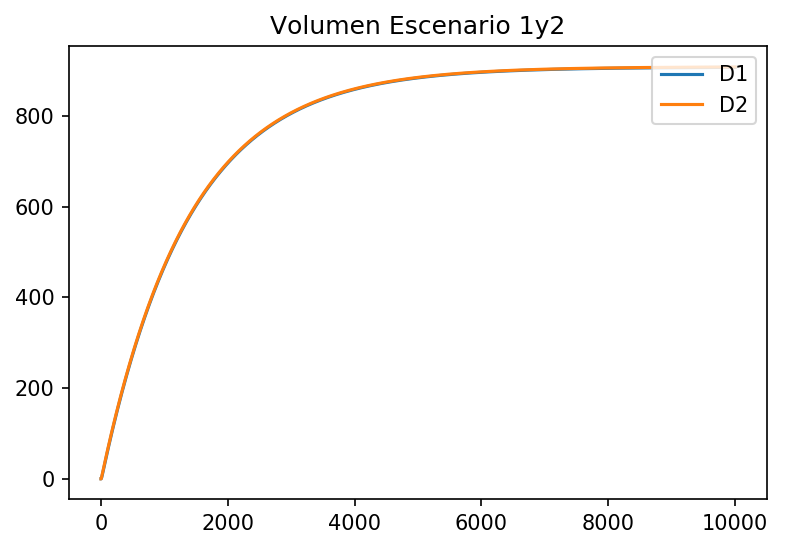

In [80]:
system3={'D1':system1['D'],'D2':system2['D']}
grafico(system3,'Escenario 1y2')

# Arterias en serie

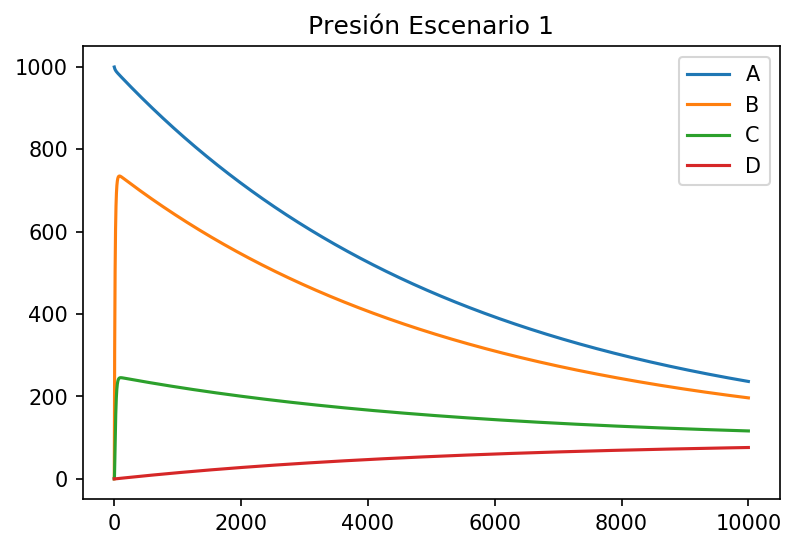

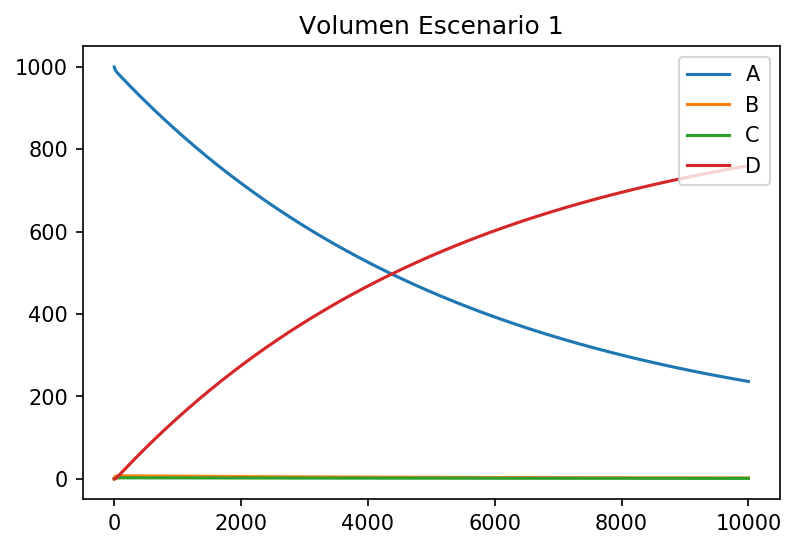

In [81]:
env = simpy.Environment()
system1 = {}
per = 0.001
system1['A'] = Tubo(env, system1, V0=1000,E=1,R=0,Vb=0,tubos=[("B",0)],periodo = per)
system1['B'] = Tubo(env, system1, V0=0,E=100,R=3,Vb=0,tubos=[("A",0),("C",0)],periodo = per)
system1['C'] = Tubo(env, system1, V0=0,E=100,R=3,Vb=0,tubos=[("B",0),("D",0)],periodo = per)
system1['D'] = Tubo(env, system1, V0=0,E=0.1,R=0,Vb=0,tubos=[("C",0)],periodo = per)
env.run(until=10)

grafico(system1,'Escenario 1')

En la conexion en serie cada arteria tiene una resistencia de 3, por lo que ahora para obtener el mismo comportamiento la resistencia debería ser 3+3=6

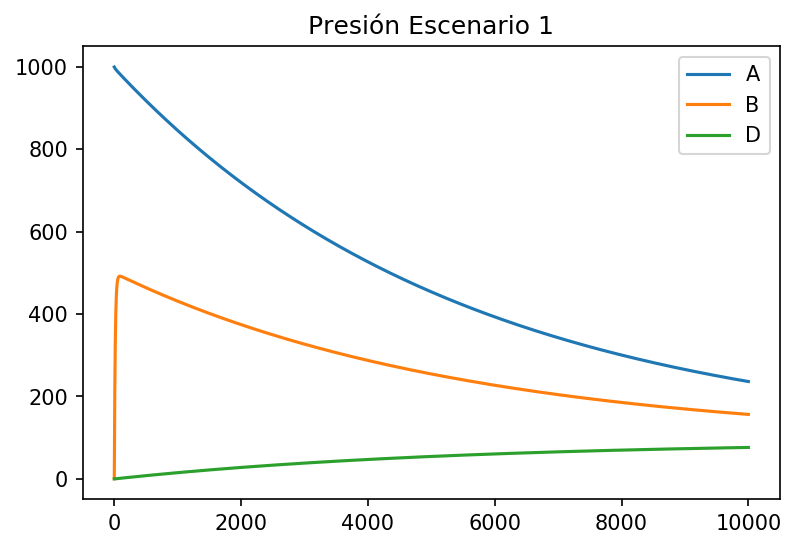

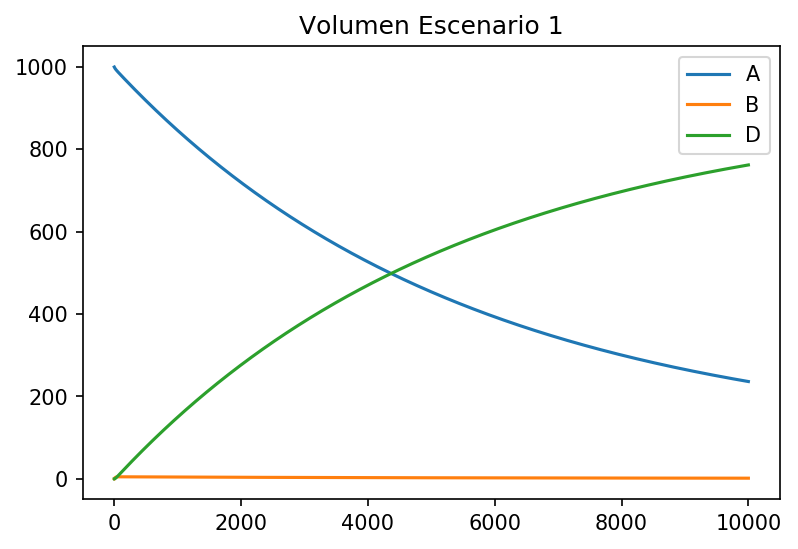

In [86]:
env = simpy.Environment()
system2 = {}
per = 0.001
system2['A'] = Tubo(env, system2, V0=1000,E=1,R=0,Vb=0,tubos=[("B",0)],periodo = per)
system2['B'] = Tubo(env, system2, V0=0,E=100,R=6,Vb=0,tubos=[("A",0),("D",0)],periodo = per)
system2['D'] = Tubo(env, system2, V0=0,E=0.1,R=0,Vb=0,tubos=[("B",0)],periodo = per)
env.run(until=10)

grafico(system2,'Escenario 1')

Al dibujar las dos curvas de llenado de D, una con dos tubos en serie de resistencia 3 y la otra con una unica arteria con resistencia 6 se observan que se rellenan a la misma velocidad

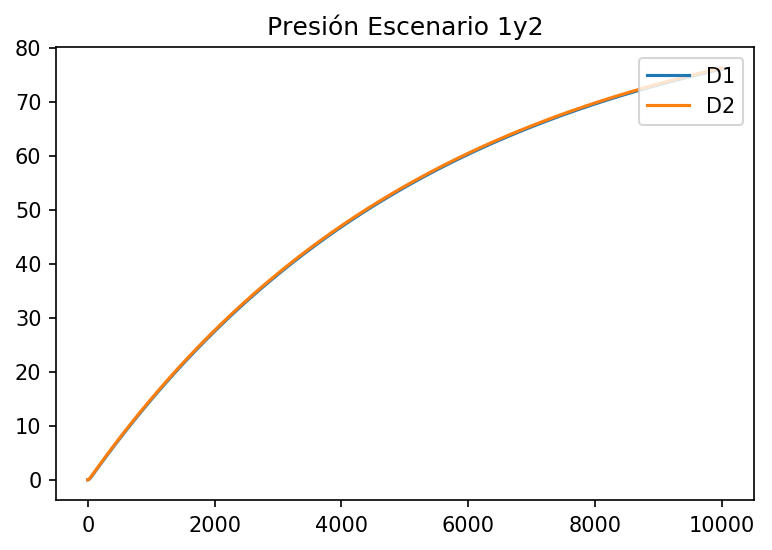

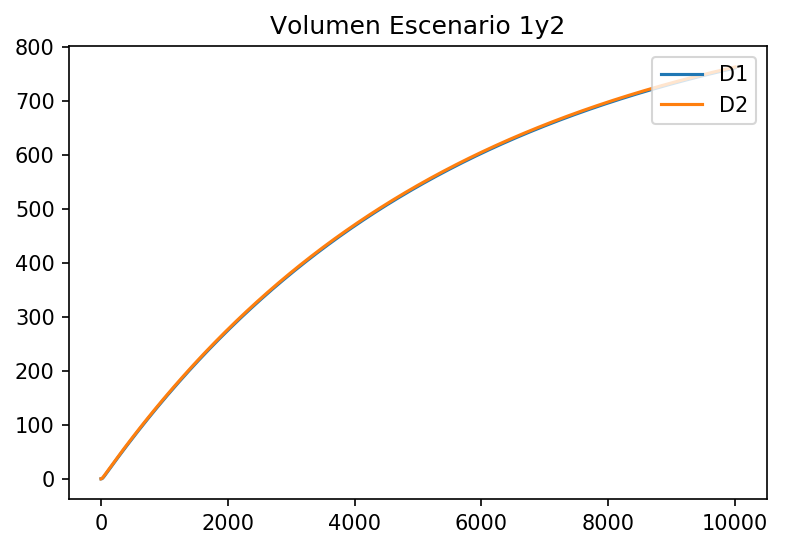

In [87]:
system3={'D1':system1['D'],'D2':system2['D']}
grafico(system3,'Escenario 1y2')